In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)
top_words = 5000 #상위 단어 5000개
#학습용, 검증용 5:5
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정
# 길이가 짧으면 공백으로
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

#Embedding
model = Sequential()
# Embedding(단어의개수, 벡터크기, 입력사이즈)
#각 단어에 대한 정수 인코딩
words = {'I':0, 'am':1, 'a':2, 'boy':3}
#Embedding(단어개수, 벡터크기, 입력사이즈(최대단어수))
#keras 신경망에 word2vec 벡터를 입력하는 방법
model.add(Embedding(5,1,input_length=1))

#가중치 값
embedding = model.layers[0].get_weights()[0]
words_embeddings = {w:embedding[idx] for w, idx in words.items()}
print(words_embeddings)
print(words_embeddings['boy'])

{'I': array([0.01701636], dtype=float32), 'am': array([0.03163273], dtype=float32), 'a': array([-0.03822608], dtype=float32), 'boy': array([-0.02253202], dtype=float32)}
[-0.02253202]


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

#create model
embedding_vector_length = 32 #벡터사이즈
model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) #순환레이어: LSTM, 출력노드수: 100
model.add(Dense(1, activation='sigmoid')) #출력레이어 노드수:1, 활성화함수: sigmoid
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
#조기종료함수, 2회에서 성능이 개선되지 않는다면 조기종료
early_stopping = EarlyStopping(patience=2)
#학습회수(epoches): 10회, validation dataset 30%
hist=model.fit(X_train[:1000], y_train[:1000], epochs=10, batch_size=64,
validation_split=0.3, callbacks=[early_stopping])

Epoch 1/10
11/11 [==============================] - 2s 67ms/step - loss: 0.6932 - accuracy: 0.4871 - val_loss: 0.6928 - val_accuracy: 0.4800
Epoch 2/10
11/11 [==============================] - 0s 41ms/step - loss: 0.6889 - accuracy: 0.5829 - val_loss: 0.6896 - val_accuracy: 0.5700
Epoch 3/10
11/11 [==============================] - 0s 39ms/step - loss: 0.6652 - accuracy: 0.7414 - val_loss: 0.6708 - val_accuracy: 0.5833
Epoch 4/10
11/11 [==============================] - 0s 43ms/step - loss: 0.6234 - accuracy: 0.7986 - val_loss: 0.6474 - val_accuracy: 0.6433
Epoch 5/10
11/11 [==============================] - 0s 40ms/step - loss: 0.6656 - accuracy: 0.8257 - val_loss: 0.6520 - val_accuracy: 0.6200
Epoch 6/10
11/11 [==============================] - 0s 38ms/step - loss: 0.5124 - accuracy: 0.8471 - val_loss: 0.6362 - val_accuracy: 0.6367
Epoch 7/10
11/11 [==============================] - 0s 41ms/step - loss: 0.3660 - accuracy: 0.8986 - val_loss: 0.5404 - val_accuracy: 0.7133
Epoch 8/10
11

In [7]:
#Final evalutaion of the model
scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)
print('정확도(학습용): %.2f%%' % (scores[1]*100))

scores = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)
print('정확도(검증용): %.2f%%' % (scores[1]*100))

32/32 [==============================] - 1s 15ms/step - loss: 0.2540 - accuracy: 0.9020
정확도(학습용): 90.20%
32/32 [==============================] - 0s 9ms/step - loss: 0.5615 - accuracy: 0.7310
정확도(검증용): 73.10%


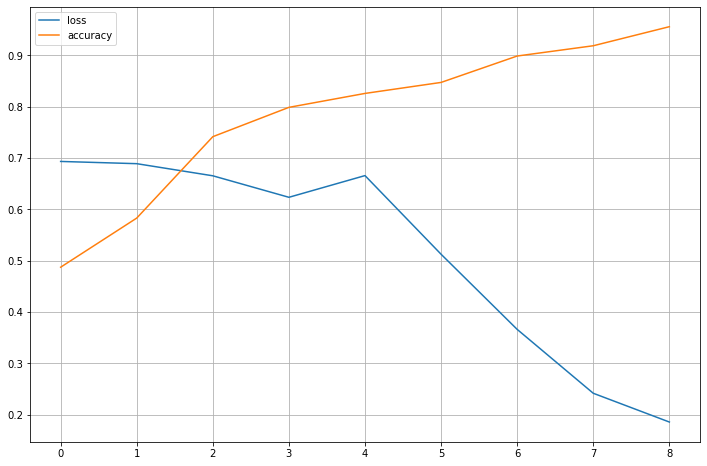

In [6]:
#모델의 학습과정
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy'])# 정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()